In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import openpyxl

In [155]:
# Replace 'your_data.xlsx' with the actual path to your Excel file
file_path = 'SiniestrosAutomovil2022.xlsx'
template_file_path = 'SiniestrosAutomovil2022-edited.xlsx'

In [156]:
# Read the CSV file
df = pd.read_excel(file_path)

df_template = pd.read_excel(template_file_path)

In [157]:
# Get a list of all column names
column_names = df.columns.tolist()
template_column_names = df_template.columns.tolist()

print(len(column_names))
print(len(template_column_names))  

177
74


In [158]:
# Remove columns that are not needed function
# Remove the diferent columns from the df that are not in the template
def remove_columns(df, template):
    for column in df.columns:
        if column not in template.columns:
            df.drop(column, axis=1, inplace=True)
    return df


In [159]:
def remove_columns_with_nulls(df):
    # Drop columns with only null values
    df_cleaned = df.dropna(axis=1, how='all')
    return df_cleaned

def remove_columns_with_zeros(df):
    # Drop columns with only 0 values
    df_cleaned = df.loc[:, (df != 0).any(axis=0)]
    return df_cleaned

def remove_rows_with_nulls(df):
    # Drop rows with only null values
    df_cleaned = df.dropna(axis=0, how='all')
    return df_cleaned

def agregar_columna_condicional(df):
    # Crear una nueva columna basada en la condición de 'Nº Stro.'
    df['Siniestro'] = df['Nº Stro.'].apply(lambda x: 1 if x > 0 else 0)
    return df

def eliminar_filas_condicionales(df):
    # Crear la nueva columna
    df['Siniestro'] = df['Nº Stro.'].apply(lambda x: 1 if x > 0 else 0)
    
    # Eliminar filas donde 'Nueva_Columna' es igual a 0
    df_filtrado = df[df['Siniestro'] != 0].copy()
    
    # Eliminar la columna temporal 'Nueva_Columna'
    df_filtrado = df_filtrado.drop('Siniestro', axis=1)
    
    return df_filtrado

In [160]:
def vincular_etiquetas(df, columnas_codigo_etiqueta):
    """
    Vincula códigos con sus etiquetas en un DataFrame.

    Parámetros:
    - df: DataFrame original.
    - columnas_codigo_etiqueta: Lista de pares de columnas (código, etiqueta) a vincular.

    Retorna:
    - DataFrame modificado con las nuevas columnas de etiquetas.
    """
    df_modificado = df.copy()

    for codigo_col, etiqueta_col in columnas_codigo_etiqueta:
        # Crear un diccionario de mapeo de código a etiqueta
        mapeo_codigo_etiqueta = dict(zip(df[codigo_col], df[etiqueta_col]))

        # Crear una nueva columna de etiquetas basada en el código
        df_modificado[f'{codigo_col}_etiqueta'] = df_modificado[codigo_col].map(mapeo_codigo_etiqueta)

    return df_modificado

In [161]:
# Remove columns that are not needed
df_cleaned = remove_columns(df, df_template)
# df_cleaned.head()

In [162]:
# Remove columns with 0 values
df = remove_columns_with_zeros(df)

column_names = df.columns.tolist()
print(len(column_names))
print(column_names)

74
['Tipo Póliza', 'Nombre Tipo Póliza', 'Contratante/Asegurado', 'Nombre Contratante/Asegurado', 'F/Nacimiento', 'Tipo Persona', 'Ciudad', 'Nombre Ciudad', 'Departamento', 'Nombre Departamento', 'F/Emisión', 'Fec. Desde', 'Fec. Hasta', 'Moneda', 'Cant. Artículos', 'Producto', 'Nombre Producto', 'Agente Principal', 'Nombre Agente Principal', 'Referencia', 'Nombre Referencia', 'Organizador Principal', 'Nombre Organizador Principal', 'Organizador', 'Nombre Organizador', 'Cobrador', 'Nombre Cobrador', 'Cod. Canal Venta', 'Canal Venta', 'Suma Asegurada', 'Prima Técnica', 'Costo de Servicio', 'Prima', 'Tipo Anulación', 'Artículo', 'Fec. Desde Art.', 'Fec. Hasta Art.', 'Suma Asegurada Art.', 'Prima Técnica Art.', 'Costo de Servicio Art.', 'Prima Art.', 'Premio Art.', 'Art. Anterior', 'Año Stro.', 'Nº Stro.', 'Parcial', 'Stro. Total', 'Stro. Art.', 'Cant. Stro.', 'Fec. Stro.', 'Fec. Denuncia.', 'Fec. Liquidación', 'Causa Stro.', 'Estimado', 'Facturado', 'Pendiente', 'Código Tipo Vehiculo', 'T

In [163]:
# Columnas a vincular (código, etiqueta)
columnas_codigo_etiqueta = [
    ('Tipo Póliza', 'Nombre Tipo Póliza'),
    ('Contratante/Asegurado', 'Nombre Contratante/Asegurado'),
    ('Ciudad', 'Nombre Ciudad'),
    ('Departamento', 'Nombre Departamento'),
    ('Agente Principal', 'Nombre Agente Principal'),
    ('Referencia', 'Nombre Referencia'),
    ('Organizador Principal', 'Nombre Organizador Principal'),
    ('Organizador', 'Nombre Organizador'),
    ('Cobrador', 'Nombre Cobrador'),
    ('Código Tipo Vehiculo', 'Tipo Vehiculo'),
    ('Código Marca', 'Marca'),
    ('Código Modelo', 'Modelo'),
    ('Código Destino Uso', 'Destino Uso'),
    ('Código Area de Circulación', 'Area de Circulación'),
    ('Código Color', 'Color'),
    ('Código Via Importación', 'Via Importación'),
    ('Código Procedencia', 'Procedencia')
]

# Llamar a la función para agregar las columnas de etiquetas
df = vincular_etiquetas(df_cleaned, columnas_codigo_etiqueta)

# Mostrar el DataFrame modificado
print(df)

       Tipo Póliza Nombre Tipo Póliza  Contratante/Asegurado  \
0                3          Anulacion             2184500000   
1                1              Nueva              267920000   
2                1              Nueva             2206650000   
3                2         Renovacion             1460830000   
4                2         Renovacion             2121020000   
...            ...                ...                    ...   
10061            1              Nueva             2313790000   
10062            2         Renovacion             2193990000   
10063            1              Nueva             1936430000   
10064            1              Nueva               64990000   
10065            1              Nueva              282010000   

                      Nombre Contratante/Asegurado         F/Nacimiento  \
0                     MEAURIO ENCISO, VICTOR CESAR  1972-08-13 00:00:00   
1                                ESTACION BAHIA SA  1990-01-01 00:00:00   
2     

In [164]:
# Extraer la segunda parte de cada tupla como lista de etiquetas
etiquetas = [etiqueta for _, etiqueta in columnas_codigo_etiqueta]

# Mostrar la lista de etiquetas
print(etiquetas)

['Nombre Tipo Póliza', 'Nombre Contratante/Asegurado', 'Nombre Ciudad', 'Nombre Departamento', 'Nombre Agente Principal', 'Nombre Referencia', 'Nombre Organizador Principal', 'Nombre Organizador', 'Nombre Cobrador', 'Tipo Vehiculo', 'Marca', 'Modelo', 'Destino Uso', 'Area de Circulación', 'Color', 'Via Importación', 'Procedencia']


In [181]:
# Eliminar las columnas de códigos originales del DataFrame modificado
df = df.drop(etiquetas, axis=1)

KeyError: "['Nombre Tipo Póliza', 'Nombre Contratante/Asegurado', 'Nombre Ciudad', 'Nombre Departamento', 'Nombre Agente Principal', 'Nombre Referencia', 'Nombre Organizador Principal', 'Nombre Organizador', 'Nombre Cobrador', 'Tipo Vehiculo', 'Marca', 'Modelo', 'Destino Uso', 'Area de Circulación', 'Color', 'Via Importación', 'Procedencia'] not found in axis"

In [ ]:
# Agregar la columna de siniestro
siniestros_df = agregar_columna_condicional(df)

# Eliminar filas sin sinestro
siniestros_df = eliminar_filas_condicionales(siniestros_df)

In [ ]:
# Mostrar el DataFrame resultante
print(df)
print(siniestros_df)

In [166]:
# Display the first few rows of the DataFrame
print("First few rows of the DataFrame:")
print(df.head())

First few rows of the DataFrame:
   Tipo Póliza  Contratante/Asegurado         F/Nacimiento  \
0            3             2184500000  1972-08-13 00:00:00   
1            1              267920000  1990-01-01 00:00:00   
2            1             2206650000  2000-01-01 00:00:00   
3            2             1460830000                  NaN   
4            2             2121020000  2000-01-01 00:00:00   

               Tipo Persona      Ciudad  Departamento  F/Emisión Fec. Desde  \
0            Persona Física  1081001000    1081000000 2022-03-31 2021-12-24   
1  Persona Jurídica Privada  1081001000    1081000000 2021-08-16 2021-07-14   
2  Persona Jurídica Privada  1081001000    1081000000 2021-08-25 2021-07-19   
3  Persona Jurídica Privada  1081001000    1081000000 2021-09-29 2021-08-21   
4  Persona Jurídica Privada  1081001000    1081000000 2021-09-29 2021-08-21   

  Fec. Hasta  Moneda  ...  Cobrador_etiqueta  Código Tipo Vehiculo_etiqueta  \
0 2022-06-12       1  ...          TESOR

In [167]:
column_names = df.columns.tolist()
print(len(column_names))
print(column_names)

75
['Tipo Póliza', 'Contratante/Asegurado', 'F/Nacimiento', 'Tipo Persona', 'Ciudad', 'Departamento', 'F/Emisión', 'Fec. Desde', 'Fec. Hasta', 'Moneda', 'Cant. Artículos', 'Producto', 'Nombre Producto', 'Agente Principal', 'Referencia', 'Organizador Principal', 'Organizador', 'Cobrador', 'Cod. Canal Venta', 'Canal Venta', 'Suma Asegurada', 'Prima Técnica', 'Costo de Servicio', 'Prima', 'Tipo Anulación', 'Artículo', 'Fec. Desde Art.', 'Fec. Hasta Art.', 'Suma Asegurada Art.', 'Prima Técnica Art.', 'Costo de Servicio Art.', 'Prima Art.', 'Premio Art.', 'Art. Anterior', 'Año Stro.', 'Nº Stro.', 'Parcial', 'Stro. Total', 'Stro. Art.', 'Cant. Stro.', 'Fec. Stro.', 'Fec. Denuncia.', 'Fec. Liquidación', 'Causa Stro.', 'Estimado', 'Facturado', 'Pendiente', 'Código Tipo Vehiculo', 'Código Marca', 'Código Modelo', 'Año', 'Código Destino Uso', 'Código Area de Circulación', 'Código Color', 'Código Via Importación', 'Código Procedencia', 'Cant. Ocupantes', 'Tipo Póliza_etiqueta', 'Contratante/Asegu

In [168]:
# List of columns to convert
columns_to_convert = ['Suma Asegurada Art.', 'Prima Técnica Art.', 'Costo de Servicio Art.', 'Prima Art.', 'Premio Art.',
                       'Suma Asegurada', 'Prima Técnica', 'Costo de Servicio', 'Prima']

# Convert negative values to positives
df[columns_to_convert] = df[columns_to_convert].abs()

Distribution of Policy Types

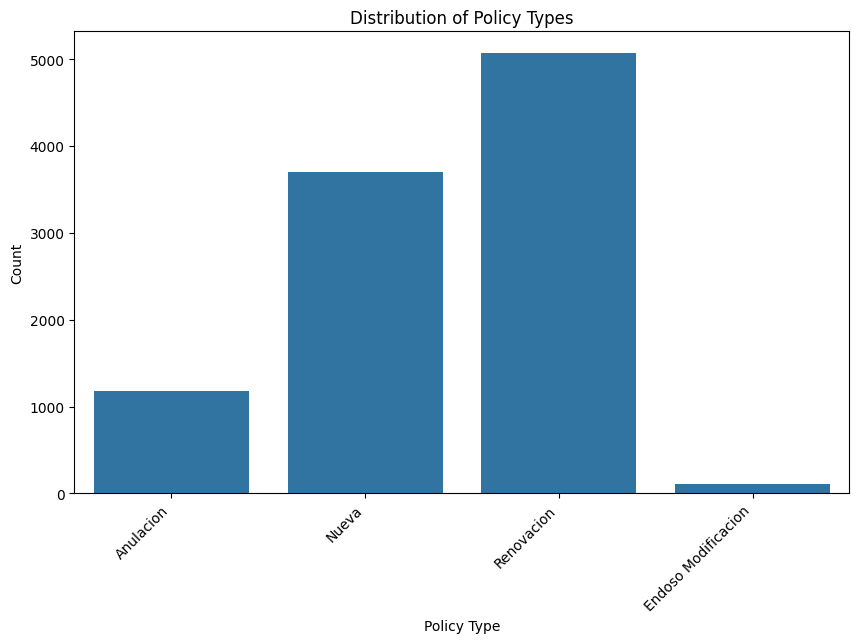

In [169]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyzing the distribution of policy types
plt.figure(figsize=(10, 6))
sns.countplot(x='Tipo Póliza_etiqueta', data=df)
plt.title('Distribution of Policy Types')
plt.xlabel('Policy Type')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

Relationship Between Policy Type and Sum Insured

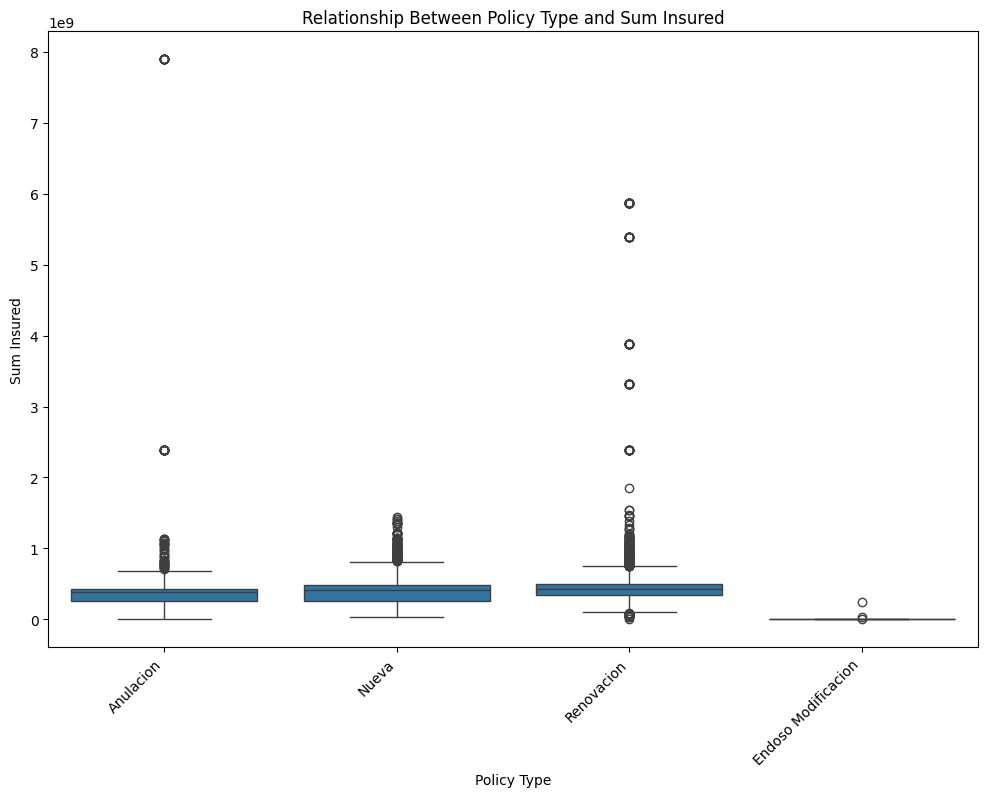

In [170]:
# Analyzing the relationship between policy type and sum insured
plt.figure(figsize=(12, 8))
sns.boxplot(x='Tipo Póliza_etiqueta', y='Suma Asegurada', data=df)
plt.title('Relationship Between Policy Type and Sum Insured')
plt.xlabel('Policy Type')
plt.ylabel('Sum Insured')
plt.xticks(rotation=45, ha='right')
plt.show()

Distribution of Policy Holders by City

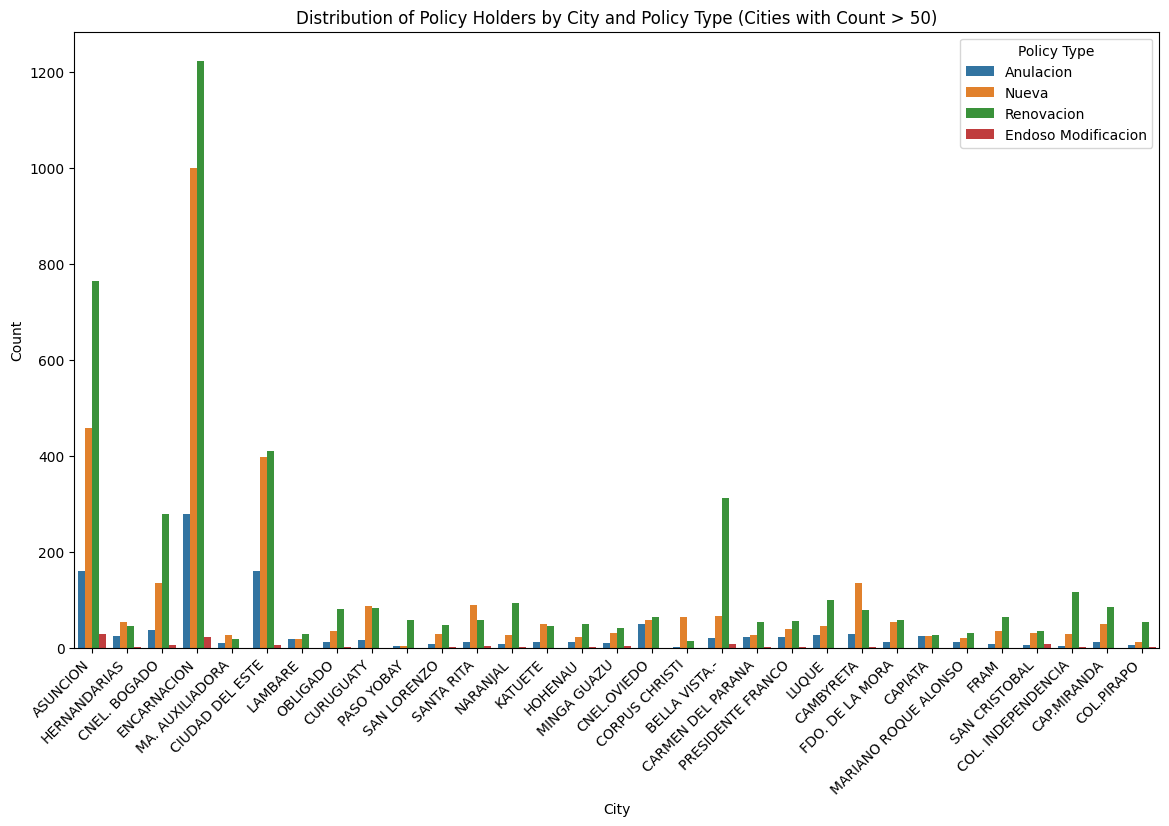

In [171]:
# Filter the DataFrame to include only cities with a count greater than 50
relevant_cities = df['Ciudad_etiqueta'].value_counts()[df['Ciudad_etiqueta'].value_counts() > 50].index

# Filter the DataFrame
df_relevant_cities = df[df['Ciudad_etiqueta'].isin(relevant_cities)]

# Plotting the distribution of policy holders by city and policy type for relevant cities
plt.figure(figsize=(14, 8))
sns.countplot(x='Ciudad_etiqueta', data=df_relevant_cities, hue='Tipo Póliza_etiqueta')
plt.title('Distribution of Policy Holders by City and Policy Type (Cities with Count > 50)')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Policy Type')
plt.show()

Correlation Heatmap

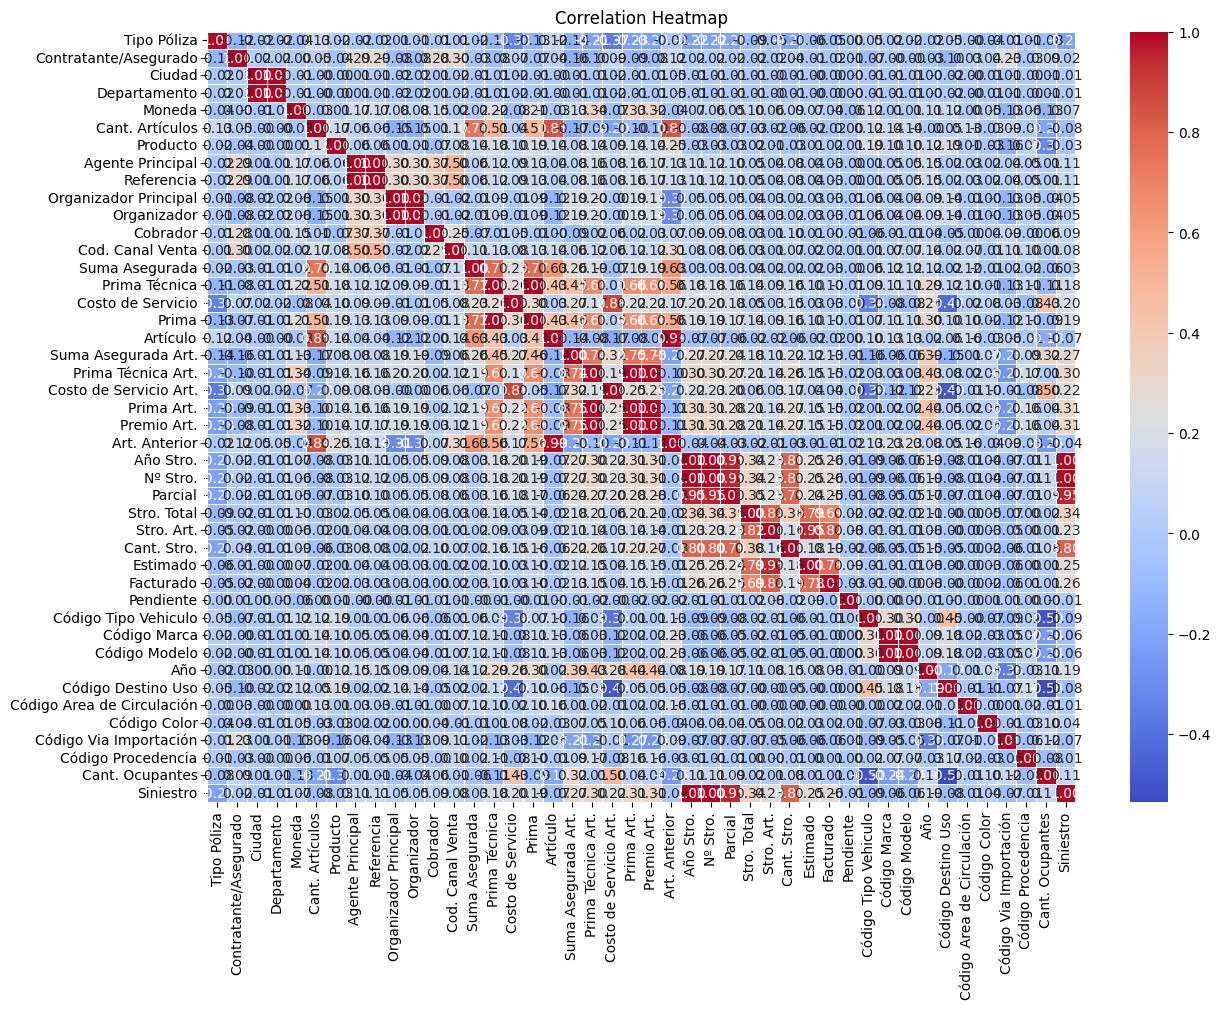

In [172]:
# Selecting only numerical columns
numerical_columns = df.select_dtypes(include=['number']).columns

# Analyzing the correlation between numerical columns
correlation_matrix = df[numerical_columns].corr()

# Plotting the correlation heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

Distribution of Policy Holders by Product

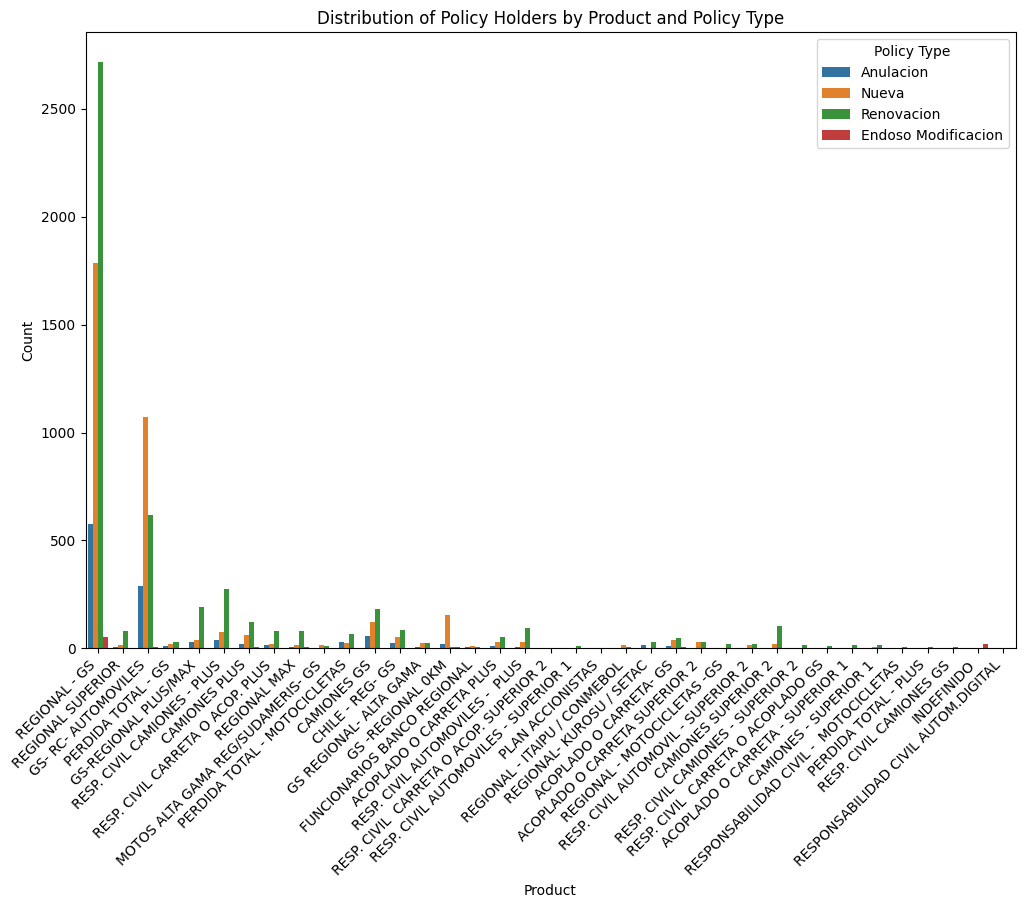

In [173]:
plt.figure(figsize=(12, 8))
sns.countplot(x='Nombre Producto', data=df, hue='Tipo Póliza_etiqueta')
plt.title('Distribution of Policy Holders by Product and Policy Type')
plt.xlabel('Product')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Policy Type')
plt.show()

Average Sum Insured by Policy Type

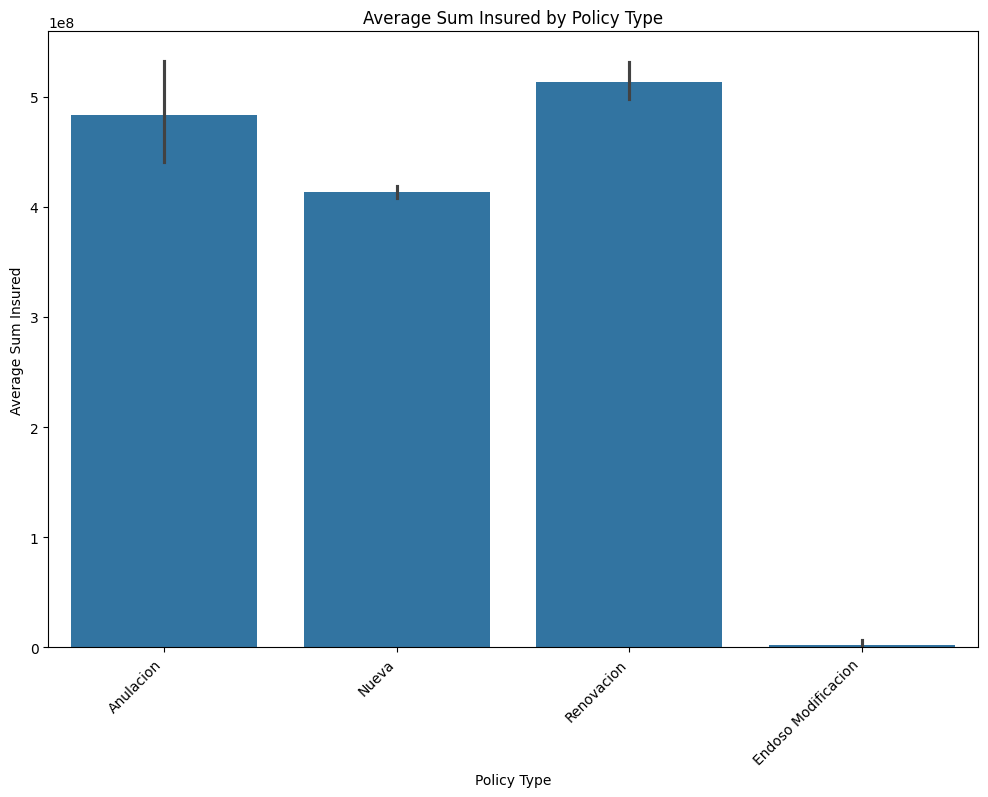

In [174]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Tipo Póliza_etiqueta', y='Suma Asegurada', data=df)
plt.title('Average Sum Insured by Policy Type')
plt.xlabel('Policy Type')
plt.ylabel('Average Sum Insured')
plt.xticks(rotation=45, ha='right')
plt.show()

Policy Type Distribution Over Time

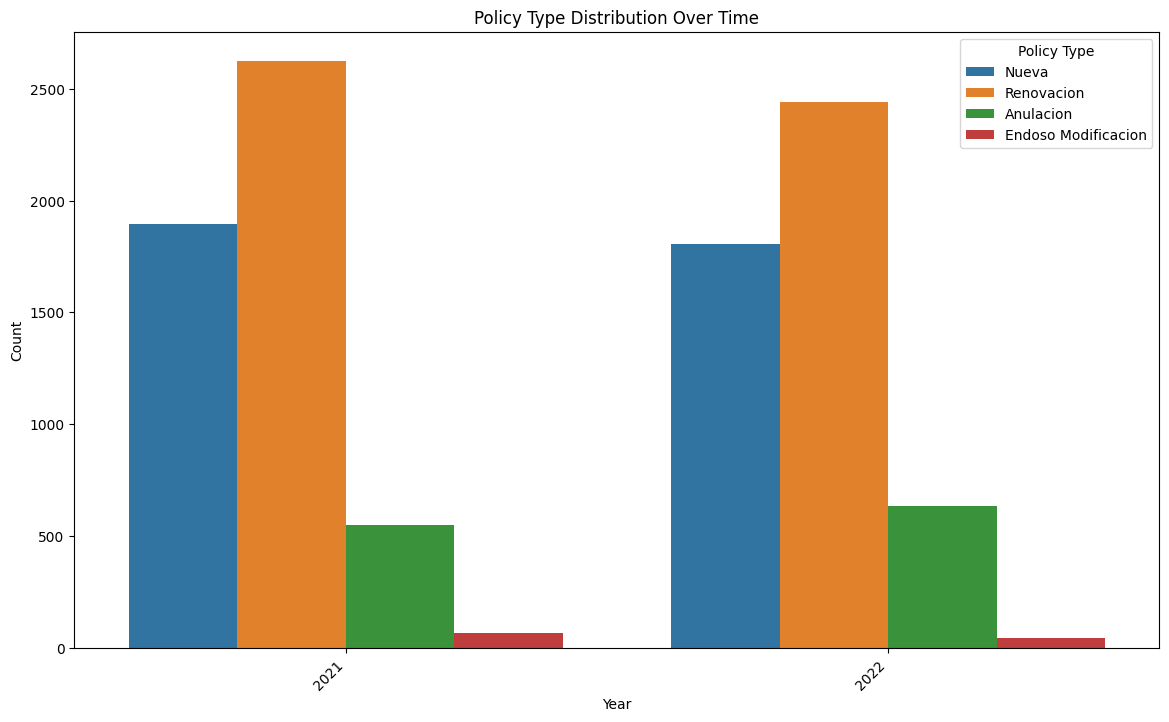

In [175]:
df['F/Emisión'] = pd.to_datetime(df['F/Emisión'])
df['Year'] = df['F/Emisión'].dt.year

plt.figure(figsize=(14, 8))
sns.countplot(x='Year', data=df, hue='Tipo Póliza_etiqueta')
plt.title('Policy Type Distribution Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Policy Type')
plt.show()

Distribution of Sum Insured by Product

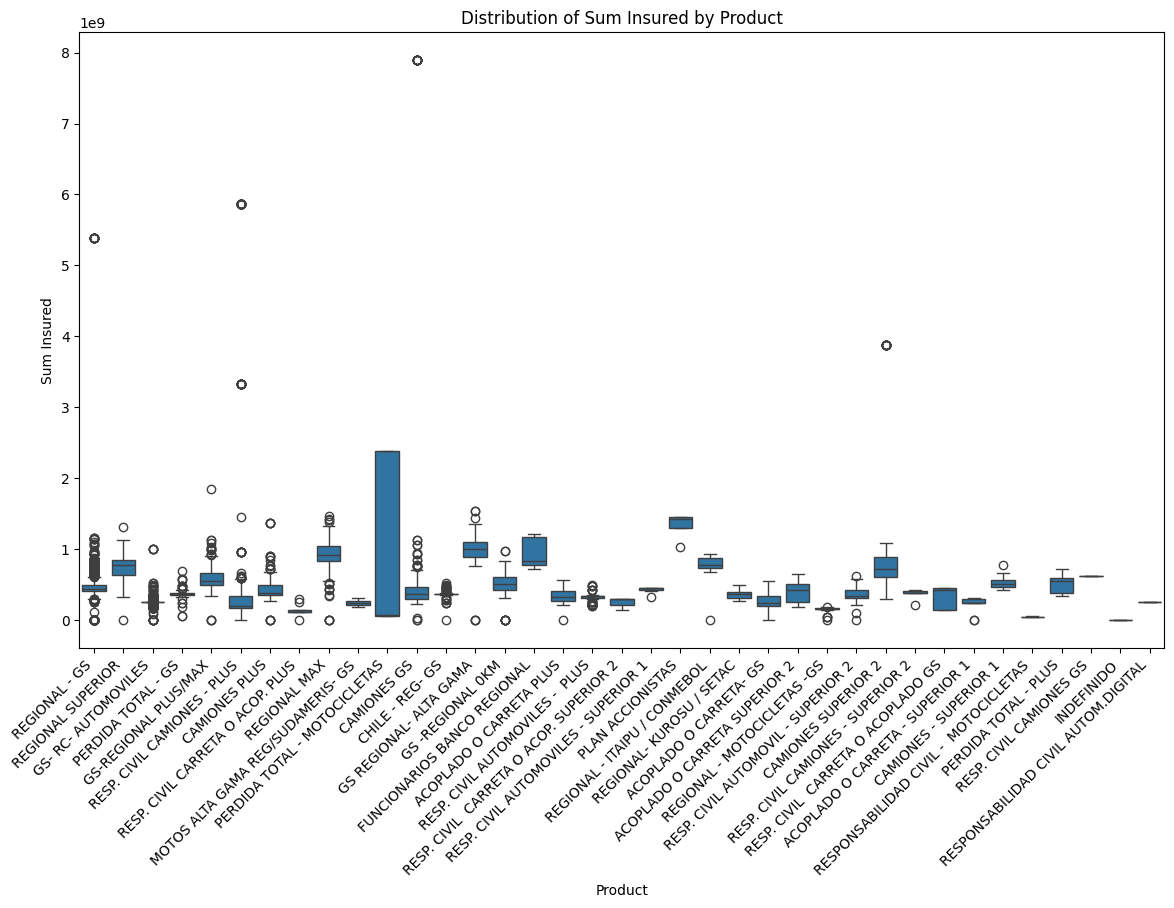

In [176]:
plt.figure(figsize=(14, 8))
sns.boxplot(x='Nombre Producto', y='Suma Asegurada', data=df)
plt.title('Distribution of Sum Insured by Product')
plt.xlabel('Product')
plt.ylabel('Sum Insured')
plt.xticks(rotation=45, ha='right')
plt.show()

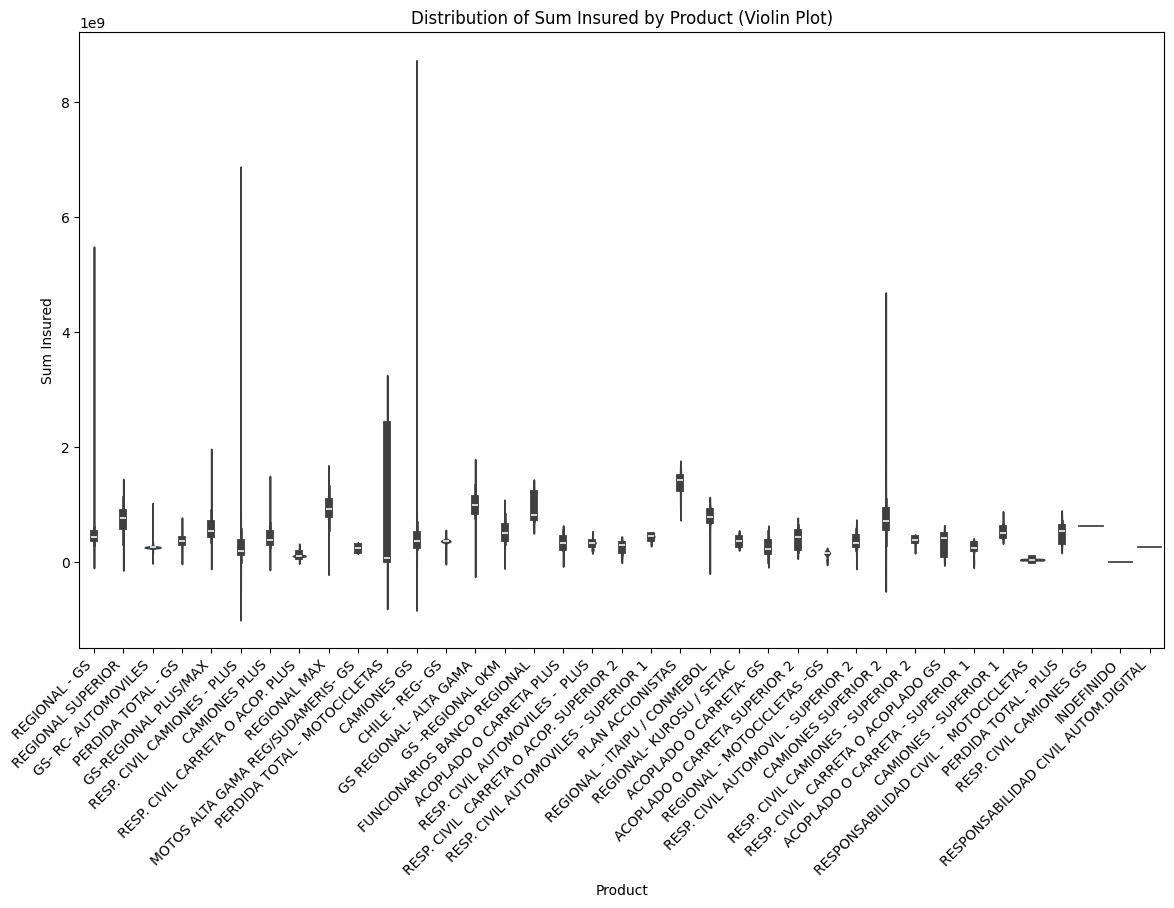

In [177]:
plt.figure(figsize=(14, 8))
sns.violinplot(x='Nombre Producto', y='Suma Asegurada', data=df)
plt.title('Distribution of Sum Insured by Product (Violin Plot)')
plt.xlabel('Product')
plt.ylabel('Sum Insured')
plt.xticks(rotation=45, ha='right')
plt.show()

Linear Relationship Between 'Suma Asegurada' and 'Prima'

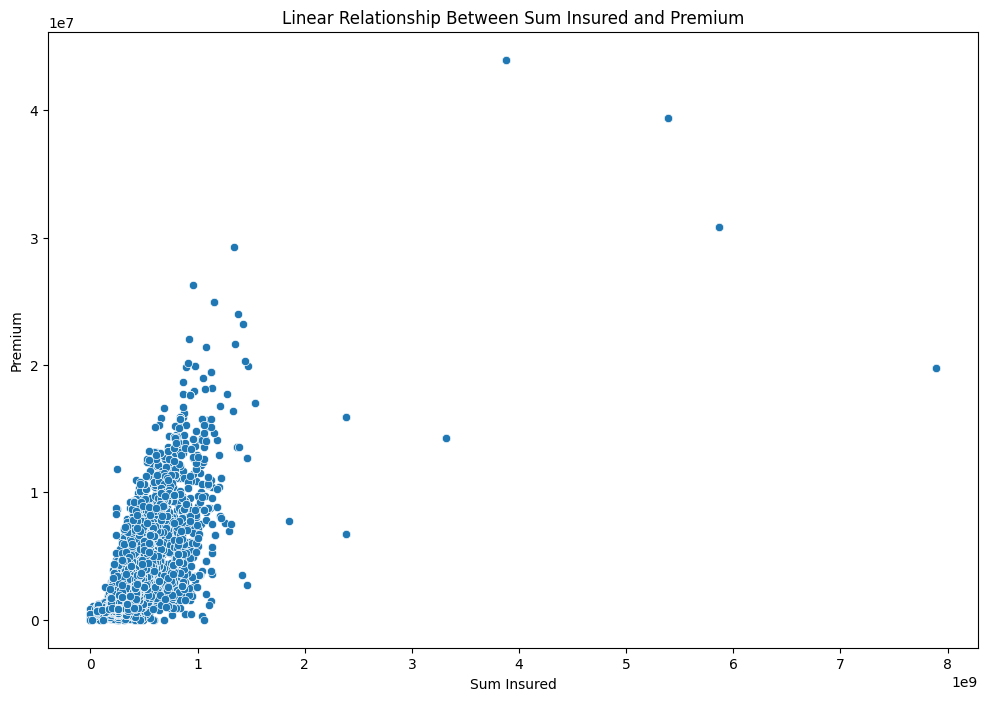

In [178]:
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Suma Asegurada', y='Prima', data=df)
plt.title('Linear Relationship Between Sum Insured and Premium')
plt.xlabel('Sum Insured')
plt.ylabel('Premium')
plt.show()

Distribution of 'Cant. Ocupantes' (Number of Occupants)

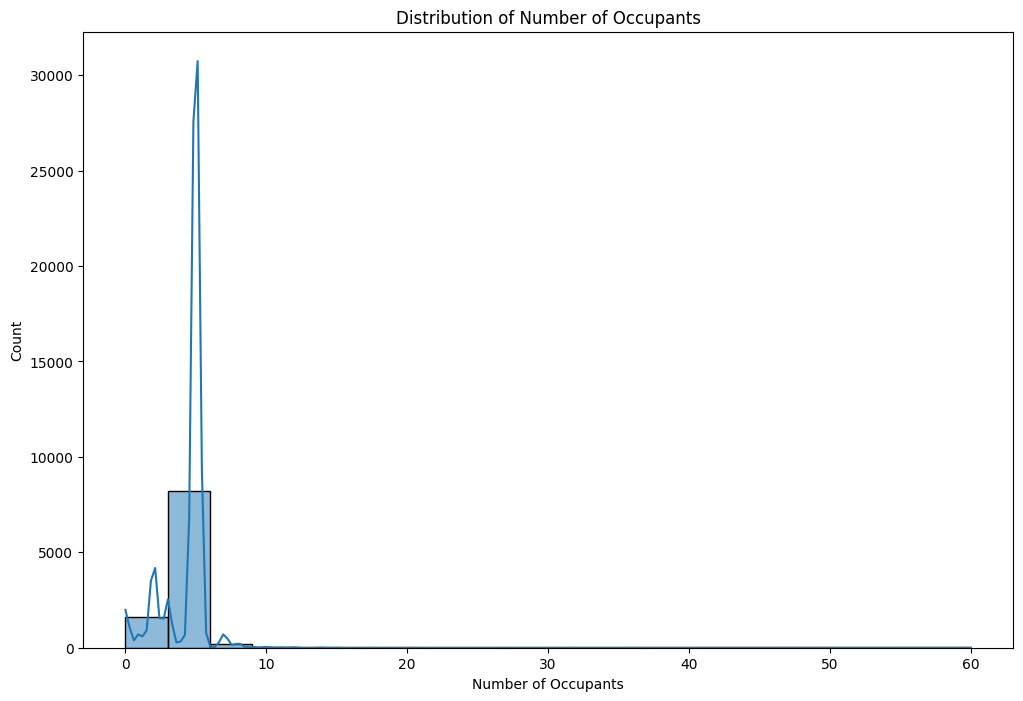

In [179]:
plt.figure(figsize=(12, 8))
sns.histplot(df['Cant. Ocupantes'], bins=20, kde=True)
plt.title('Distribution of Number of Occupants')
plt.xlabel('Number of Occupants')
plt.ylabel('Count')
plt.show()

Line Plot Showing Trends Over Time

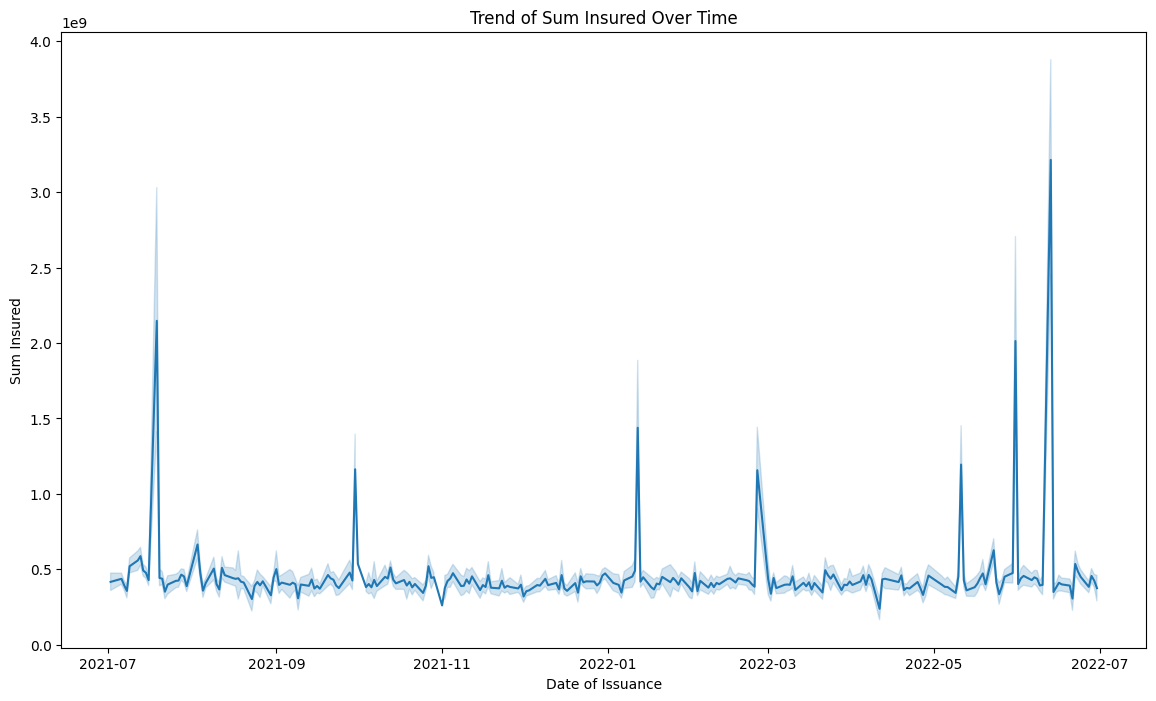

In [180]:
# Assuming you have a datetime column 'F/Emisión' in your dataset
df['F/Emisión'] = pd.to_datetime(df['F/Emisión'])

plt.figure(figsize=(14, 8))
sns.lineplot(x='F/Emisión', y='Suma Asegurada', data=df)
plt.title('Trend of Sum Insured Over Time')
plt.xlabel('Date of Issuance')
plt.ylabel('Sum Insured')
plt.show()